Koneksi ke Google Drive

In [247]:
#Pengambilan file identitas kaggle di drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Pemasangan Kaggle

In [248]:
#Install kaggle API agar bisa mengunduh dataset kaggle
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [249]:
#Perintah linux untuk membuat folder ~/.kaggle/ dan mengcopy file kaggle.json ke folder tersebut
! mkdir ~/.kaggle/
! cp drive/MyDrive/kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [250]:
#Pengunduhan dataset kaggle
!kaggle datasets download -d lava18/google-play-store-apps

google-play-store-apps.zip: Skipping, found more recently modified local copy (use --force to force download)


Ekstrasi Data

In [251]:
import zipfile
def unzip(local_zip,dest_zip):
  zip_ref = zipfile.ZipFile(local_zip, 'r')
  zip_ref.extractall(dest_zip)
  zip_ref.close()
unzip("/content/google-play-store-apps.zip", "/content/google-play-store-apps")

Import Library

In [252]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import sklearn

Data loading

In [253]:
#Data ini tidak memiliki header, jadi kita tambahkkan dalam parameter names
apps = pd.read_csv("/content/google-play-store-apps/googleplaystore.csv")
print(apps.columns)
apps

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [254]:
apps.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [255]:
apps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

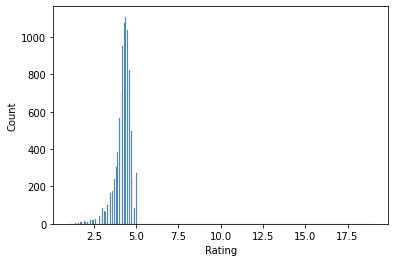

In [256]:
sns.histplot(x=apps['Rating'])

In [257]:
apps.loc[(apps['Rating']>5) ]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Menyaring rating yang tidak lebih dari 5

In [258]:
apps = apps.loc[(apps['Rating']<=5)]
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


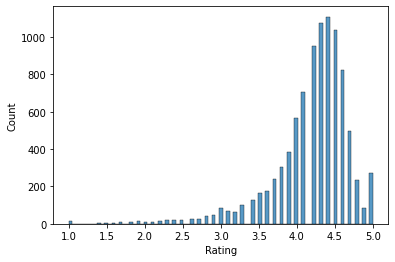

In [259]:
sns.histplot(x=apps['Rating'])

In [260]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [261]:
apps["Reviews"] = pd.to_numeric(apps["Reviews"])
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.0+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [262]:
apps.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

In [263]:
apps[apps.isnull().any(axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


Melihat banyak kategori yang ada

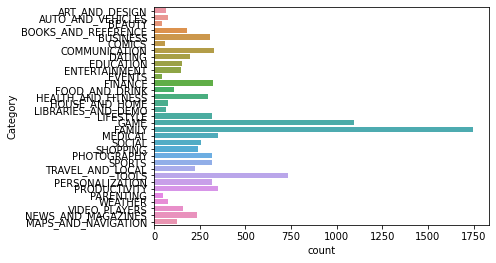

In [264]:
sns.countplot(y=apps['Category'])

Dropping kolom yang kurang terpakai

In [265]:
for i in ['Last Updated','Current Ver', "Genres"]:
  try:
    apps.drop(i,axis=1,inplace=True)
  except:
    continue

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Menghilangkan data null

In [266]:
apps = apps.loc[~apps.isnull().any(axis=1)]
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,4.4 and up
...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Varies with device


In [267]:
apps['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [268]:
apps.loc[apps["Size"]=='Varies with device']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Varies with device
...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Varies with device


In [269]:
apps['Size'].str[-1].unique()

array(['M', 'e', 'k'], dtype=object)

In [270]:
apps_sizeChange=apps.copy()
apps_sizeChange

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,4.4 and up
...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Varies with device


In [271]:
apps_sizeChange.loc[apps_sizeChange['Size'].str[-1]=="M"]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,4.4 and up
...,...,...,...,...,...,...,...,...,...,...
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2.3M,"100,000+",Free,0,Everyone,1.6 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,4.1 and up


In [272]:
apps_sizeChange.loc[apps_sizeChange['Size'].str[-1]=="k"]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
58,Restart Navigator,AUTO_AND_VEHICLES,4.0,1403,201k,"100,000+",Free,0,Everyone,2.2 and up
209,Plugin:AOT v5.0,BUSINESS,3.1,4034,23k,"100,000+",Free,0,Everyone,2.2 and up
384,Hangouts Dialer - Call Phones,COMMUNICATION,4.0,122498,79k,"10,000,000+",Free,0,Everyone,4.0.3 and up
450,Caller ID +,COMMUNICATION,4.0,9498,118k,"1,000,000+",Free,0,Everyone,2.3 and up
458,GO Notifier,COMMUNICATION,4.2,124346,695k,"10,000,000+",Free,0,Everyone,2.0 and up
...,...,...,...,...,...,...,...,...,...,...
10732,Draw with FP sDraw,TOOLS,4.3,3268,467k,"100,000+",Free,0,Everyone,2.0 and up
10755,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676k,"10,000+",Free,0,Everyone,2.3.3 and up
10763,FP Разбитый дисплей,FAMILY,4.5,922,552k,"50,000+",Free,0,Everyone,1.6 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,2.1 and up


In [273]:
apps_sizeChange.loc[apps_sizeChange['Size']=="Varies with device"]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Varies with device
...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Varies with device


Mengganti data size menjadi float

In [274]:
#apps_sizeChange.loc[apps_sizeChange['Size'].str[-1]=="M"]
#apps_sizeChange.loc[apps_sizeChange['Size'].str[-1]=="M"]["Size"].str[:-1].astype(float)
#apps_sizeChange['Size'].map(lambda x: x[:-1] if "M" in x else x).loc[(apps_sizeChange['Size'].str[-1]!="k") & (apps_sizeChange['Size'].str[-1]!="e")]
apps_sizeChange["Size"] = apps_sizeChange['Size'].map(lambda x: x[:-1] if "M" in x else x)

In [275]:
#apps_sizeChange['Size'].map(lambda x: float(x[:-1])*0.001 if "k" in x else x).loc[(apps_sizeChange['Size'].str[-1]!="M") & (apps_sizeChange['Size'].str[-1]!="e")]
apps_sizeChange["Size"] = apps_sizeChange['Size'].map(lambda x: float(x[:-1])*0.001 if "k" in x else x)

In [276]:
app_size_number = apps_sizeChange.loc[apps_sizeChange['Size'].str[-1]!="e"]
app_size_number["Size"] = app_size_number["Size"].astype(float)
app_size_number["Size"].mean(), app_size_number["Size"].mode()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(22.961853694836286, 0    14.0
 dtype: float64)

In [277]:
app_size_number.sort_values(["Size"], ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
5530,The Walking Dead: Our World,GAME,4.0,22435,100.0000,"1,000,000+",Free,0,Teen,5.0 and up
9170,Stickman Legends: Shadow Wars,GAME,4.4,38419,100.0000,"1,000,000+",Paid,$0.99,Everyone 10+,4.1 and up
1793,Mini Golf King - Multiplayer Game,GAME,4.5,531458,100.0000,"5,000,000+",Free,0,Everyone,4.0.3 and up
1565,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100.0000,"10,000,000+",Free,0,Everyone,4.0 and up
8847,Draft Simulator for FUT 18,SPORTS,4.6,162933,100.0000,"5,000,000+",Free,0,Everyone,4.1 and up
...,...,...,...,...,...,...,...,...,...,...
10072,ExDialer PRO Key,COMMUNICATION,4.5,5474,0.0170,"100,000+",Paid,$3.99,Everyone,2.1 and up
4977,Ad Remove Plugin for App2SD,PRODUCTIVITY,4.1,66,0.0170,"1,000+",Paid,$1.29,Everyone,2.2 and up
4983,My baby firework (Remove ad),FAMILY,4.1,30,0.0140,"1,000+",Paid,$0.99,Everyone,Varies with device
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,0.0110,"1,000,000+",Free,0,Everyone,1.5 and up


In [278]:
apps_sizeChange.loc[apps_sizeChange['Size']=="Varies with device", "Size"] = app_size_number["Size"].mean()
apps_sizeChange

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,"10,000+",Free,0,Everyone,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000+",Free,0,Everyone,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,"50,000,000+",Free,0,Teen,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,4.4 and up
...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6,500+,Free,0,Everyone,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53,"5,000+",Free,0,Everyone,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,22.961854,"1,000+",Free,0,Mature 17+,Varies with device


In [279]:
apps_sizeChange["Size"] = apps_sizeChange["Size"].astype(float)
apps_sizeChange.describe()

,Rating,Reviews,Size
count,9364.000000,9.364000e+03,9364.000000
mean,4.191702,5.141596e+05,22.961854
std,0.515260,3.144369e+06,21.298834
min,1.000000,1.000000e+00,0.008500
25%,4.000000,1.860000e+02,6.600000
50%,4.300000,5.941500e+03,21.000000
75%,4.500000,8.156075e+04,27.000000
max,5.000000,7.815831e+07,100.000000


In [280]:
apps_sizeChange[apps_sizeChange.isnull().any(axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver


In [281]:
apps_sizeChange['Content Rating'].value_counts()

Everyone           7418
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

Menyatukan data unrated dan Adults only kedalam Mature 17+

In [282]:
apps_sizeChange['Content Rating'].replace(["Adults only 18+","Unrated"],["Mature 17+","Mature 17+"], inplace=True)

In [283]:
apps_sizeChange['Content Rating'].value_counts()

Everyone        7418
Teen            1084
Mature 17+       465
Everyone 10+     397
Name: Content Rating, dtype: int64

In [284]:
for i in apps_sizeChange.columns:
  print(i,apps_sizeChange[i].unique(), len(apps_sizeChange[i].unique()))

App ['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Fr. Mike Schmitz Audio Teachings' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology'] 8194
Category ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION'] 33
Rating [4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 3.2 4.  4.8 4.9 3.6 3.7 3.3 3.4 3.5
 3.1 5.  2.6 3.  1.9 2.5 2.8 2.7 1.  2.9 2.3 2.2 1.7 2.  1.8 2.4 1.6 2.1
 1.4 1.5 1.2] 39
Reviews [   159    967  87510 ...    603   1195 398307] 5992
Size [1.90000000e+01 1.40000000e+0

In [285]:
version_count = apps_sizeChange["Android Ver"].value_counts()
version_count

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [286]:
version_count[version_count<240].keys(), len(version_count[version_count<240].keys())

(Index(['3.0 and up', '2.2 and up', '4.3 and up', '2.1 and up', '1.6 and up',
        '6.0 and up', '7.0 and up', '3.2 and up', '2.0 and up', '5.1 and up',
        '1.5 and up', '3.1 and up', '2.0.1 and up', '4.4W and up', '8.0 and up',
        '7.1 and up', '4.0.3 - 7.1.1', '5.0 - 8.0', '1.0 and up', '7.0 - 7.1.1',
        '4.1 - 7.1.1', '5.0 - 6.0'],
       dtype='object'), 22)

In [287]:
apps_sizeChange["Android Ver"].replace(version_count[version_count<240].keys(), ["Others" for i in range(len(version_count[version_count<240].keys()))], inplace=True)
apps_sizeChange["Android Ver"].replace("Varies with device", "Others", inplace=True)


In [288]:
apps_sizeChange["Android Ver"].value_counts()

Others          2364
4.1 and up      2059
4.0.3 and up    1240
4.0 and up      1131
4.4 and up       875
2.3 and up       582
5.0 and up       535
4.2 and up       338
2.3.3 and up     240
Name: Android Ver, dtype: int64

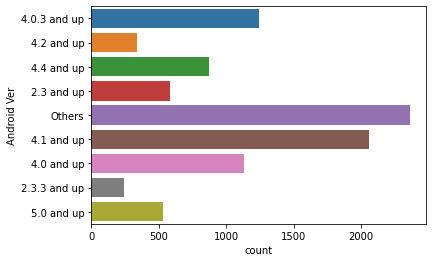

In [289]:
sns.countplot(y=apps_sizeChange['Android Ver'])

In [290]:
#App	Category	Rating	Reviews	Size	Installs	Type
#Price	Content Rating	Genres	Last Updated	Current Ver	Android Ver
apps_sizeChange.isna().any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Android Ver       False
dtype: bool

In [291]:
apps_sizeChange.loc[apps_sizeChange[["App"]].duplicated(keep=False)].sort_values(by=["App"])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.800000,"500,000+",Free,0,Everyone 10+,2.3.3 and up
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.800000,"500,000+",Free,0,Everyone 10+,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26.000000,"1,000,000+",Free,0,Everyone,5.0 and up
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26.000000,"1,000,000+",Free,0,Everyone,5.0 and up
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.800000,"1,000+",Paid,$16.99,Everyone,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...
3103,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,22.961854,"50,000,000+",Free,0,Everyone,Others
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,22.961854,"50,000,000+",Free,0,Everyone,Others
3118,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,22.961854,"50,000,000+",Free,0,Everyone,Others
3652,wetter.com - Weather and Radar,WEATHER,4.2,189313,38.000000,"10,000,000+",Free,0,Everyone,Others


In [292]:
apps_sizeChange.drop_duplicates(subset="App",inplace=True)

In [293]:
apps_sizeChange.shape

(8194, 10)

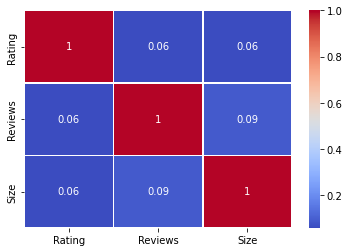

In [294]:
correlation_matrix = apps_sizeChange.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

In [295]:
scale_cols = ["Rating", "Reviews", "Size", "Installs", "Price"]

In [296]:
apps_sizeChange.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Android Ver'],
      dtype='object')

In [297]:
apps_sizeChange['Installs'] = pd.to_numeric(apps_sizeChange['Installs'].str.replace(r'\D+','',regex=True))

In [298]:
apps_sizeChange['Price']  = pd.to_numeric(apps_sizeChange['Price'].str.replace(r'\$','',regex=True))

In [299]:
apps_sizeChange.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8194 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8194 non-null   object 
 1   Category        8194 non-null   object 
 2   Rating          8194 non-null   float64
 3   Reviews         8194 non-null   int64  
 4   Size            8194 non-null   float64
 5   Installs        8194 non-null   int64  
 6   Type            8194 non-null   object 
 7   Price           8194 non-null   float64
 8   Content Rating  8194 non-null   object 
 9   Android Ver     8194 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 704.2+ KB


In [300]:
apps_sizeChange

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.000000,10000,Free,0.0,Everyone,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000000,500000,Free,0.0,Everyone,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700000,5000000,Free,0.0,Everyone,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.000000,50000000,Free,0.0,Teen,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.800000,100000,Free,0.0,Everyone,4.4 and up
...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.600000,500,Free,0.0,Everyone,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.000000,5000,Free,0.0,Everyone,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.600000,100,Free,0.0,Everyone,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,22.961854,1000,Free,0.0,Mature 17+,Others


In [301]:
apps_sizeChange.isna().sum().sum()

0

Content-Based Filtering

In [302]:
#Category Based
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tf = TfidfVectorizer()
tfm_category = tf.fit_transform(apps_sizeChange["Category"])
cosine_category=cosine_similarity(tfm_category)
tfm_category, cosine_category

(<8194x33 sparse matrix of type '<class 'numpy.float64'>'
 	with 8194 stored elements in Compressed Sparse Row format>,
 array([[1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]]))

In [303]:
sim_data = pd.DataFrame(cosine_category, index=apps_sizeChange["App"], columns=apps_sizeChange["App"])
sim_data

App,Photo Editor & Candy Camera & Grid & ScrapBook,Coloring book moana,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",Sketch - Draw & Paint,Pixel Draw - Number Art Coloring Book,Paper flowers instructions,Smoke Effect Photo Maker - Smoke Editor,Infinite Painter,Garden Coloring Book,Kids Paint Free - Drawing Fun,...,Manga-FR - Anime Vostfr,Bulgarian French Dictionary Fr,News Minecraft.fr,FR Tides,Chemin (fr),FR Calculator,Sya9a Maroc - FR,Fr. Mike Schmitz Audio Teachings,The SCP Foundation DB fr nn5n,iHoroscope - 2018 Daily Horoscope & Astrology
App,,,,,,,,,,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Coloring book moana,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sketch - Draw & Paint,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pixel Draw - Number Art Coloring Book,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FR Calculator,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
Sya9a Maroc - FR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
Fr. Mike Schmitz Audio Teachings,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [304]:
sim_data.loc["Coloring book moana"]

App
Photo Editor & Candy Camera & Grid & ScrapBook        1.0
Coloring book moana                                   1.0
U Launcher Lite – FREE Live Cool Themes, Hide Apps    1.0
Sketch - Draw & Paint                                 1.0
Pixel Draw - Number Art Coloring Book                 1.0
                                                     ... 
FR Calculator                                         0.0
Sya9a Maroc - FR                                      0.0
Fr. Mike Schmitz Audio Teachings                      0.0
The SCP Foundation DB fr nn5n                         0.0
iHoroscope - 2018 Daily Horoscope & Astrology         0.0
Name: Coloring book moana, Length: 8194, dtype: float64

In [305]:
def get_rec(name, sim_data=sim_data, items=apps_sizeChange, num=20):
  idx = sim_data.loc[:,name].to_numpy().argpartition(range(-1,-num,-1))
  closest = sim_data.columns[idx[-1:-(num+2):-1]]
  closest = closest.drop(name,errors="ignore")
  print(closest)
  return pd.DataFrame(closest).merge(items).head(num)

In [306]:
apps.loc[1]

App               Coloring book moana
Category               ART_AND_DESIGN
Rating                            3.9
Reviews                           967
Size                              14M
Installs                     500,000+
Type                             Free
Price                               0
Content Rating               Everyone
Android Ver              4.0.3 and up
Name: 1, dtype: object

In [307]:
sim_to_moana=get_rec("Coloring book moana")
sim_to_moana

Index(['Photo Editor & Candy Camera & Grid & ScrapBook', 'I Creative Idea',
       'How to draw Ladybug and Cat Noir',
       'UNICORN - Color By Number & Pixel Art Coloring', 'Floor Plan Creator',
       'PIP Camera - PIP Collage Maker',
       'How To Color Disney Princess - Coloring Pages',
       'Drawing Clothes Fashion Ideas', 'Sad Poetry Photo Frames 2018',
       'Textgram - write on photos',
       'Popsicle Sticks and Similar DIY Craft Ideas',
       'Canva: Poster, banner, card maker & graphic design',
       'Install images with music to make video without Net - 2018',
       'Easy Origami Ideas', 'How To Draw Food', 'Anime Manga Coloring Book',
       'AJ Styles Wallpaper 2018 - AJ Styles HD Wallpaper',
       'Spring flowers theme couleurs d t space',
       'Little Teddy Bear Colouring Book Game',
       'X Launcher: With OS11 Style Theme & Control Center'],
      dtype='object', name='App')


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.000000,10000,Free,0.0,Everyone,4.0.3 and up
1,I Creative Idea,ART_AND_DESIGN,4.7,353,4.200000,10000,Free,0.0,Teen,4.1 and up
2,How to draw Ladybug and Cat Noir,ART_AND_DESIGN,3.8,564,9.200000,100000,Free,0.0,Everyone,4.1 and up
3,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145,24.000000,500000,Free,0.0,Everyone,4.4 and up
4,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,22.961854,5000000,Free,0.0,Everyone,2.3.3 and up
5,PIP Camera - PIP Collage Maker,ART_AND_DESIGN,4.7,158,11.000000,10000,Free,0.0,Everyone,4.0.3 and up
6,How To Color Disney Princess - Coloring Pages,ART_AND_DESIGN,4.0,591,9.400000,500000,Free,0.0,Everyone,4.0 and up
7,Drawing Clothes Fashion Ideas,ART_AND_DESIGN,4.2,117,15.000000,10000,Free,0.0,Everyone,4.0.3 and up
8,Sad Poetry Photo Frames 2018,ART_AND_DESIGN,4.5,176,10.000000,100000,Free,0.0,Everyone,4.0.3 and up
9,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,22.961854,10000000,Free,0.0,Everyone,Others


In [308]:
sim_to_moana.loc[sim_to_moana["Category"]!="ART_AND_DESIGN"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver


In [309]:
sim_scp= get_rec("The SCP Foundation DB fr nn5n")
sim_scp

Index(['Surah Al-Waqiah', 'eBoox new: Reader for fb2 epub zip books',
       'Only 30 days in English, the guideline is guaranteed', 'Moon+ Reader',
       'English-Myanmar Dictionary', 'Golden Dictionary (EN-AR)',
       'All Language Translator Free', 'Azpen eReader',
       'English Dictionary - Offline', 'Ag PhD Field Guide',
       'Learn CT Scan Of Head', '50000 Free eBooks & Free AudioBooks',
       'Ae Allah na Dai (Rasa)', '10,000 Quotes DB (Premium)',
       'Guide for DB Xenoverse', 'Free Book Reader',
       'Guide for DB Xenoverse 2', 'The Pursuit of God', 'DC HSEMA', '日本AV历史',
       'Kinot & Eichah for Tisha B'Av'],
      dtype='object', name='App')


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
0,Surah Al-Waqiah,BOOKS_AND_REFERENCE,4.7,1201,2.900000,100000,Free,0.00,Everyone,2.3.3 and up
1,eBoox new: Reader for fb2 epub zip books,BOOKS_AND_REFERENCE,4.9,2739,21.000000,50000,Free,0.00,Everyone,Others
2,"Only 30 days in English, the guideline is guar...",BOOKS_AND_REFERENCE,4.6,1065,2.300000,500000,Free,0.00,Everyone,Others
3,Moon+ Reader,BOOKS_AND_REFERENCE,4.4,233757,22.961854,10000000,Free,0.00,Everyone,Others
4,English-Myanmar Dictionary,BOOKS_AND_REFERENCE,4.4,8788,10.000000,1000000,Free,0.00,Everyone,4.0 and up
5,Golden Dictionary (EN-AR),BOOKS_AND_REFERENCE,4.4,51269,6.100000,1000000,Free,0.00,Everyone,4.2 and up
6,All Language Translator Free,BOOKS_AND_REFERENCE,4.4,30105,2.100000,1000000,Free,0.00,Everyone,4.0.3 and up
7,Azpen eReader,BOOKS_AND_REFERENCE,3.5,156,42.000000,500000,Free,0.00,Everyone,Others
8,English Dictionary - Offline,BOOKS_AND_REFERENCE,4.4,341157,30.000000,10000000,Free,0.00,Everyone 10+,4.2 and up
9,Ag PhD Field Guide,BOOKS_AND_REFERENCE,4.1,114,6.300000,10000,Free,0.00,Everyone,2.3 and up


In [310]:
sim_scp.loc[sim_scp["Category"]=="BOOKS_AND_REFERENCE"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
0,Surah Al-Waqiah,BOOKS_AND_REFERENCE,4.7,1201,2.900000,100000,Free,0.00,Everyone,2.3.3 and up
1,eBoox new: Reader for fb2 epub zip books,BOOKS_AND_REFERENCE,4.9,2739,21.000000,50000,Free,0.00,Everyone,Others
2,"Only 30 days in English, the guideline is guar...",BOOKS_AND_REFERENCE,4.6,1065,2.300000,500000,Free,0.00,Everyone,Others
3,Moon+ Reader,BOOKS_AND_REFERENCE,4.4,233757,22.961854,10000000,Free,0.00,Everyone,Others
4,English-Myanmar Dictionary,BOOKS_AND_REFERENCE,4.4,8788,10.000000,1000000,Free,0.00,Everyone,4.0 and up
5,Golden Dictionary (EN-AR),BOOKS_AND_REFERENCE,4.4,51269,6.100000,1000000,Free,0.00,Everyone,4.2 and up
6,All Language Translator Free,BOOKS_AND_REFERENCE,4.4,30105,2.100000,1000000,Free,0.00,Everyone,4.0.3 and up
7,Azpen eReader,BOOKS_AND_REFERENCE,3.5,156,42.000000,500000,Free,0.00,Everyone,Others
8,English Dictionary - Offline,BOOKS_AND_REFERENCE,4.4,341157,30.000000,10000000,Free,0.00,Everyone 10+,4.2 and up
9,Ag PhD Field Guide,BOOKS_AND_REFERENCE,4.1,114,6.300000,10000,Free,0.00,Everyone,2.3 and up
